In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform 
from matplotlib import font_manager, rc
%matplotlib inline 
# jupyter notebook에서만 필요한 것, 맥이나 리눅스에서 안보일 확률이 높기 때문에 미리 넣어준다.(파이썬 명령어는 아님!)

In [21]:
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [2]:
power_data = pd.read_excel('data/시도별_용도별.xls') #엑셀 파일을 read_excel 함수로 읽어서 power_data에 저장
print(power_data.shape)
# 1줄은 열 이름으로 빠지기 때문에 19행으로 읽는 것

(19, 28)


In [3]:
power_data.head(10) #상위 10개 행 출력

# power_data.tail(10) : 마지막 10개 행을 출력

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [4]:
type(power_data)

pandas.core.frame.DataFrame

In [5]:
power_data.columns # 열 확인하기

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [6]:
power_data.values

array([['강원', 1940933, 1400421, 6203749, 7604170, 607139, 398287,
        6002286, 546621, 13027, 19147, 24382, 7727, 175323, 84397,
        3695776, 1038913, 39477, 35063, 2019, 38062, 43986, 113448,
        108629, 12872, 3418, 7007712, 16552816],
       ['개성', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       ['경기', 16587710, 5533662, 33434551, 38968213, 2371347, 317263,
        56603327, 2544420, 2109963, 529274, 1917458, 731348, 6881775,
        1336390, 1728379, 2020196, 2302355, 3613798, 317244, 1040171,
        24519644, 2977165, 67594, 1833112, 133041, 59291937, 114847859],
       ['경남', 4260988, 1427560, 8667737, 10095297, 2141813, 95989,
        18053778, 932743, 346974, 60160, 817685, 28486, 1865583, 178498,
        429920, 3809547, 1699879, 1902913, 8070, 924235, 534196, 2156059,
        2048646, 262523, 47662, 20291580, 34647864],
       ['경북', 3302463, 1578115, 8487402, 10065517, 1747462, 224568,
        30115601, 566071, 37

In [7]:
power = power_data.set_index('구분') #기존 데이터에 인덱스 값이 적용되지 않는다.
power

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358


In [10]:
# power = power_data.set_index('구분', inplace=True) #인덱스 적용이 되어서 원본 데이터가 수정이 된다.
# power

In [8]:
power = power.drop(['합계', '개성'], errors='ignore') # errors=ignore는 에러가 나도 무시하라는 뜻
power

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,4399,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


**데이터 수집 : 필요한 데이터 채취**
### 탐색적 분석 - 특성을 파악

In [9]:
power.describe() 
# 데이터 특성이 바로 출력
## mean은 중앙값이지, 평균이 아님(평균은 average)

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,...,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01
mean,3.912786e+06,1.388502e+06,8.291312e+06,9.679813e+06,9.400665e+05,102720.176471,1.523205e+07,6.636738e+05,6.623886e+05,113237.000000,...,6.199825e+05,28781.235294,3.412887e+05,2.805870e+06,1.053153e+06,2.600299e+05,2.005222e+05,33137.000000,1.627484e+07,2.986743e+07
std,4.310227e+06,1.298531e+06,8.708909e+06,9.981623e+06,1.010972e+06,122502.337918,1.524290e+07,6.333206e+05,9.612365e+05,192034.155445,...,9.142491e+05,75569.163261,3.788489e+05,6.246070e+06,1.031256e+06,5.260199e+05,4.450945e+05,38105.462924,1.598920e+07,2.618055e+07
min,3.849030e+05,2.996750e+05,6.454240e+05,9.450990e+05,1.515000e+04,2898.000000,2.415370e+05,1.102110e+05,3.497000e+03,1324.000000,...,1.167000e+03,0.000000,7.710000e+02,0.000000e+00,7.730000e+02,0.000000e+00,1.743000e+03,743.000000,1.588755e+06,2.918758e+06
25%,1.940933e+06,8.263960e+05,3.955921e+06,4.910602e+06,7.460800e+04,14019.000000,2.910768e+06,2.041710e+05,7.589500e+04,6782.000000,...,7.797000e+04,4395.000000,8.360900e+04,4.622500e+04,1.134480e+05,1.765600e+04,1.339200e+04,2875.000000,2.988274e+06,1.538637e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,71529.000000,1.236782e+07,5.329430e+05,3.338460e+05,27998.000000,...,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,3.856852e+06,1.400421e+06,7.582169e+06,8.888045e+06,1.747462e+06,139856.000000,2.145393e+07,9.327430e+05,7.316510e+05,72680.000000,...,7.825700e+05,14319.000000,4.289060e+05,1.124564e+06,2.156059e+06,1.239350e+05,1.327070e+05,46038.000000,2.462327e+07,3.464786e+07
max,1.658771e+07,5.533662e+06,3.343455e+07,3.896821e+07,3.096126e+06,398287.000000,5.660333e+07,2.544420e+06,3.780171e+06,639429.000000,...,3.613798e+06,317244.000000,1.125141e+06,2.451964e+07,2.977165e+06,2.048646e+06,1.833112e+06,133041.000000,5.929194e+07,1.148479e+08


In [10]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

In [11]:
power.corr() # 상관 계수를 의미

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
주거용,1.000000,0.968208,0.993062,0.992397,0.183021,0.259366,0.475353,0.562628,0.347158,0.440822,...,0.707940,0.740148,0.314404,0.658536,0.328133,-0.057185,0.757546,0.488640,0.466725,0.828039
공공용,0.968208,1.000000,0.977184,0.982679,0.289228,0.445645,0.571719,0.678742,0.415701,0.436911,...,0.741008,0.799645,0.424889,0.747134,0.370052,-0.075811,0.820691,0.588545,0.566736,0.880180
서비스업,0.993062,0.977184,1.000000,0.999618,0.229043,0.328698,0.503074,0.567335,0.366519,0.413328,...,0.680005,0.720635,0.325040,0.667452,0.332221,-0.060255,0.740996,0.482372,0.496594,0.847891
업무용합계,0.992397,0.982679,0.999618,1.000000,0.237465,0.344762,0.513306,0.583295,0.373865,0.417465,...,0.689700,0.732777,0.338871,0.679545,0.338002,-0.062435,0.753280,0.497432,0.507003,0.854285
농림어업,0.183021,0.289228,0.229043,0.237465,1.000000,0.460858,0.645797,0.569895,0.278175,0.196454,...,0.426459,0.325212,0.443589,0.463655,0.378778,0.295225,0.337104,0.561378,0.682414,0.537437
광업,0.259366,0.445645,0.328698,0.344762,0.460858,1.000000,0.603422,0.611013,0.337671,0.305145,...,0.422256,0.429263,0.428638,0.597099,0.399194,-0.070702,0.448317,0.438114,0.612058,0.547946
제조업,0.475353,0.571719,0.503074,0.513306,0.645797,0.603422,1.000000,0.772639,0.571111,0.490107,...,0.722683,0.688860,0.688703,0.849990,0.832303,0.163405,0.688486,0.687165,0.998781,0.883946
식료품제조,0.562628,0.678742,0.567335,0.583295,0.569895,0.611013,0.772639,1.000000,0.320004,0.655535,...,0.770564,0.752255,0.650868,0.829555,0.553969,0.024756,0.815692,0.855355,0.777291,0.789729
"섬유,의류",0.347158,0.415701,0.366519,0.373865,0.278175,0.337671,0.571111,0.320004,1.000000,0.175425,...,0.432278,0.425135,0.484763,0.431400,0.635234,-0.033036,0.336478,0.625892,0.564630,0.544530
"목재,나무",0.440822,0.436911,0.413328,0.417465,0.196454,0.305145,0.490107,0.655535,0.175425,1.000000,...,0.606411,0.540203,0.250721,0.544674,0.308283,-0.140454,0.642268,0.616246,0.481991,0.526103


In [12]:
power.corr(method='pearson')

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
주거용,1.000000,0.968208,0.993062,0.992397,0.183021,0.259366,0.475353,0.562628,0.347158,0.440822,...,0.707940,0.740148,0.314404,0.658536,0.328133,-0.057185,0.757546,0.488640,0.466725,0.828039
공공용,0.968208,1.000000,0.977184,0.982679,0.289228,0.445645,0.571719,0.678742,0.415701,0.436911,...,0.741008,0.799645,0.424889,0.747134,0.370052,-0.075811,0.820691,0.588545,0.566736,0.880180
서비스업,0.993062,0.977184,1.000000,0.999618,0.229043,0.328698,0.503074,0.567335,0.366519,0.413328,...,0.680005,0.720635,0.325040,0.667452,0.332221,-0.060255,0.740996,0.482372,0.496594,0.847891
업무용합계,0.992397,0.982679,0.999618,1.000000,0.237465,0.344762,0.513306,0.583295,0.373865,0.417465,...,0.689700,0.732777,0.338871,0.679545,0.338002,-0.062435,0.753280,0.497432,0.507003,0.854285
농림어업,0.183021,0.289228,0.229043,0.237465,1.000000,0.460858,0.645797,0.569895,0.278175,0.196454,...,0.426459,0.325212,0.443589,0.463655,0.378778,0.295225,0.337104,0.561378,0.682414,0.537437
광업,0.259366,0.445645,0.328698,0.344762,0.460858,1.000000,0.603422,0.611013,0.337671,0.305145,...,0.422256,0.429263,0.428638,0.597099,0.399194,-0.070702,0.448317,0.438114,0.612058,0.547946
제조업,0.475353,0.571719,0.503074,0.513306,0.645797,0.603422,1.000000,0.772639,0.571111,0.490107,...,0.722683,0.688860,0.688703,0.849990,0.832303,0.163405,0.688486,0.687165,0.998781,0.883946
식료품제조,0.562628,0.678742,0.567335,0.583295,0.569895,0.611013,0.772639,1.000000,0.320004,0.655535,...,0.770564,0.752255,0.650868,0.829555,0.553969,0.024756,0.815692,0.855355,0.777291,0.789729
"섬유,의류",0.347158,0.415701,0.366519,0.373865,0.278175,0.337671,0.571111,0.320004,1.000000,0.175425,...,0.432278,0.425135,0.484763,0.431400,0.635234,-0.033036,0.336478,0.625892,0.564630,0.544530
"목재,나무",0.440822,0.436911,0.413328,0.417465,0.196454,0.305145,0.490107,0.655535,0.175425,1.000000,...,0.606411,0.540203,0.250721,0.544674,0.308283,-0.140454,0.642268,0.616246,0.481991,0.526103


In [15]:
power.corr(method='kendall')

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
주거용,1.000000,0.602941,0.794118,0.779412,0.191176,0.161765,0.294118,0.455882,0.441176,0.500000,...,0.661765,0.250000,0.264706,0.308824,0.352941,0.205882,0.661765,0.470588,0.308824,0.529412
공공용,0.602941,1.000000,0.750000,0.764706,0.235294,0.441176,0.338235,0.558824,0.338235,0.426471,...,0.382353,0.147059,0.161765,0.294118,0.220588,0.338235,0.529412,0.397059,0.352941,0.573529
서비스업,0.794118,0.750000,1.000000,0.985294,0.279412,0.338235,0.382353,0.544118,0.352941,0.500000,...,0.514706,0.191176,0.264706,0.279412,0.352941,0.294118,0.573529,0.352941,0.397059,0.647059
업무용합계,0.779412,0.764706,0.985294,1.000000,0.264706,0.352941,0.397059,0.529412,0.338235,0.485294,...,0.529412,0.205882,0.279412,0.294118,0.338235,0.308824,0.588235,0.338235,0.411765,0.661765
농림어업,0.191176,0.235294,0.279412,0.264706,1.000000,0.588235,0.573529,0.441176,0.073529,0.455882,...,0.235294,0.088235,0.367647,0.235294,0.279412,0.279412,0.176471,0.397059,0.588235,0.397059
광업,0.161765,0.441176,0.338235,0.352941,0.588235,1.000000,0.544118,0.558824,0.132353,0.485294,...,0.264706,0.264706,0.338235,0.323529,0.338235,0.308824,0.294118,0.397059,0.529412,0.455882
제조업,0.294118,0.338235,0.382353,0.397059,0.573529,0.544118,1.000000,0.544118,0.411765,0.617647,...,0.485294,0.338235,0.617647,0.397059,0.647059,0.470588,0.338235,0.500000,0.985294,0.735294
식료품제조,0.455882,0.558824,0.544118,0.529412,0.441176,0.558824,0.544118,1.000000,0.279412,0.750000,...,0.411765,0.323529,0.426471,0.441176,0.397059,0.279412,0.588235,0.632353,0.558824,0.544118
"섬유,의류",0.441176,0.338235,0.352941,0.338235,0.073529,0.132353,0.411765,0.279412,1.000000,0.323529,...,0.455882,0.426471,0.441176,0.220588,0.529412,0.294118,0.279412,0.441176,0.397059,0.382353
"목재,나무",0.500000,0.426471,0.500000,0.485294,0.455882,0.485294,0.617647,0.750000,0.323529,1.000000,...,0.573529,0.308824,0.411765,0.455882,0.500000,0.294118,0.485294,0.647059,0.632353,0.529412


In [16]:
power.corr(method='spearman')

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
주거용,1.000000,0.757353,0.916667,0.911765,0.245098,0.284314,0.414216,0.620098,0.590686,0.656863,...,0.791667,0.360294,0.355392,0.448529,0.441176,0.311275,0.808824,0.625000,0.416667,0.683824
공공용,0.757353,1.000000,0.882353,0.884804,0.367647,0.575980,0.458333,0.710784,0.446078,0.531863,...,0.500000,0.200980,0.325980,0.387255,0.303922,0.419118,0.693627,0.563725,0.460784,0.718137
서비스업,0.916667,0.882353,1.000000,0.997549,0.370098,0.504902,0.517157,0.654412,0.475490,0.637255,...,0.688725,0.247549,0.330882,0.394608,0.433824,0.411765,0.745098,0.541667,0.519608,0.801471
업무용합계,0.911765,0.884804,0.997549,1.000000,0.365196,0.509804,0.519608,0.651961,0.465686,0.625000,...,0.698529,0.262255,0.355392,0.406863,0.428922,0.414216,0.767157,0.534314,0.522059,0.806373
농림어업,0.245098,0.367647,0.370098,0.365196,1.000000,0.757353,0.718137,0.627451,0.125000,0.637255,...,0.291667,0.139706,0.490196,0.294118,0.350490,0.448529,0.252451,0.575980,0.735294,0.529412
광업,0.284314,0.575980,0.504902,0.509804,0.757353,1.000000,0.727941,0.779412,0.174020,0.700980,...,0.343137,0.325980,0.487745,0.394608,0.470588,0.487745,0.384804,0.563725,0.725490,0.571078
제조업,0.414216,0.458333,0.517157,0.519608,0.718137,0.727941,1.000000,0.705882,0.549020,0.762255,...,0.612745,0.436275,0.801471,0.507353,0.786765,0.629902,0.460784,0.625000,0.997549,0.791667
식료품제조,0.620098,0.710784,0.654412,0.651961,0.627451,0.779412,0.705882,1.000000,0.384804,0.892157,...,0.607843,0.450980,0.598039,0.632353,0.546569,0.414216,0.742647,0.811275,0.708333,0.678922
"섬유,의류",0.590686,0.446078,0.475490,0.465686,0.125000,0.174020,0.549020,0.384804,1.000000,0.436275,...,0.615196,0.590686,0.566176,0.333333,0.698529,0.455882,0.424020,0.593137,0.541667,0.534314
"목재,나무",0.656863,0.531863,0.637255,0.625000,0.637255,0.700980,0.762255,0.892157,0.436275,1.000000,...,0.735294,0.443627,0.602941,0.622549,0.659314,0.448529,0.661765,0.801471,0.764706,0.627451


In [23]:
p = power.drop('합계', axis=1)
p

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,661307,516493,58446,180189,252662,1381273,68127,41814,33616,5937633
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,69342,77970,2949,83609,474561,218191,5439,31657,2252,2640312
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,872952,904149,4913,107717,90644,1046529,231141,49733,13104,7645804
서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,4399,...,64682,163688,4395,11425,46225,20182,17656,132707,2875,1938107


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, '주거용'),
  Text(2, 0, '공공용'),
  Text(3, 0, '서비스업'),
  Text(4, 0, '업무용합계'),
  Text(5, 0, '농림어업'),
  Text(6, 0, '광업'),
  Text(7, 0, '제조업'),
  Text(8, 0, '식료품제조'),
  Text(9, 0, '섬유,의류'),
  Text(10, 0, '목재,나무'),
  Text(11, 0, '펄프,종이'),
  Text(12, 0, '출판,인쇄'),
  Text(13, 0, '석유,화확'),
  Text(14, 0, '의료,광학'),
  Text(15, 0, '요업'),
  Text(16, 0, '1차금속'),
  Text(17, 0, '조립금속'),
  Text(18, 0, '기타기계'),
  Text(19, 0, '사무기기'),
  Text(20, 0, '전기기기'),
  Text(21, 0, '영상,음향'),
  Text(22, 0, '자동차'),
  Text(23, 0, '기타운송'),
  Text(24, 0, '가구및기타'),
  Text(25, 0, '재생재료'),
  Text(26, 0, '산업용합계')])

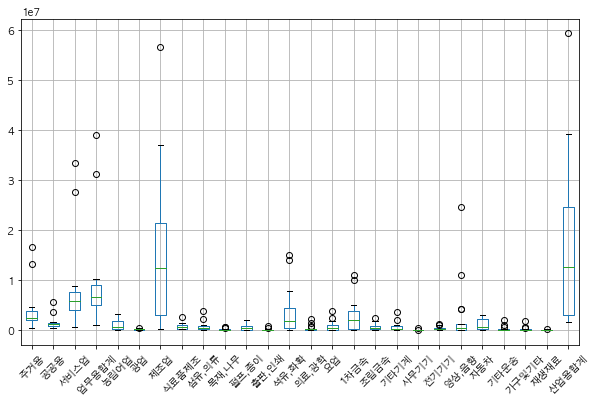

In [25]:
p.boxplot(figsize=(10,6))
plt.xticks(rotation=45) # x축 45도 돌리기

         제조업      서비스업
구분                    
강원   6002286   6203749
경기  56603327  33434551
경남  18053778   8667737
경북  30115601   8487402
광주   2910768   3174973
대구   5862633   5470438
대전   2608343   3955921
부산   7512588   7582169
서울   1918893  27647345
세종   1502922    645424
울산  25883132   3649386
인천  12367816   7154416
전남  21453926   5690659
전북  12965875   4910318
제주    241537   2308732
충남  37057955   7164439
충북  15883448   4804638


<AxesSubplot:>

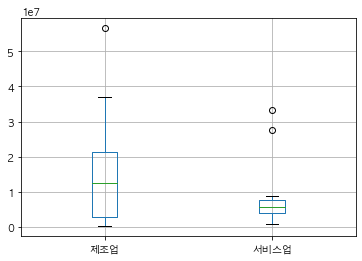

In [29]:
a=power[['제조업', '서비스업']]
print(a)
a.boxplot()

In [30]:
power = power.drop('합계', axis=1)

<AxesSubplot:ylabel='구분'>

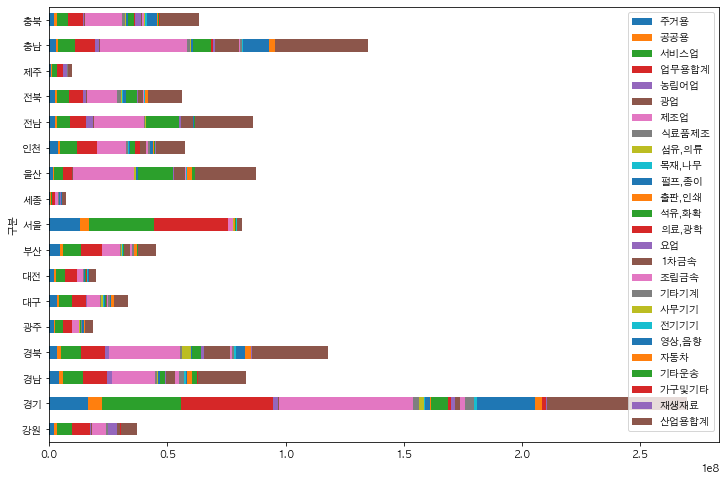

In [38]:
power.plot(kind='barh', figsize=(12, 8), stacked=True)
#barh-수평, bar-수직, stacked=True-누적, stacked=False-단독

<AxesSubplot:ylabel='구분'>

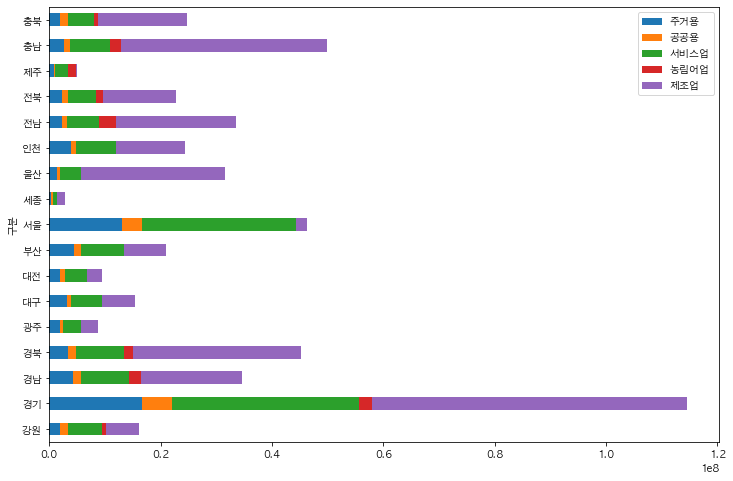

In [34]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

<AxesSubplot:>

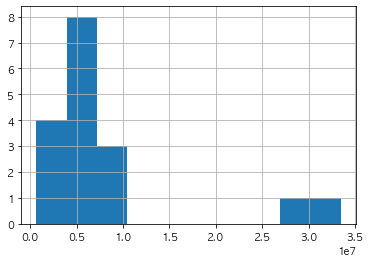

In [39]:
power['서비스업'].hist()

In [40]:
power=power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


Text(0, 0.5, '제조업')

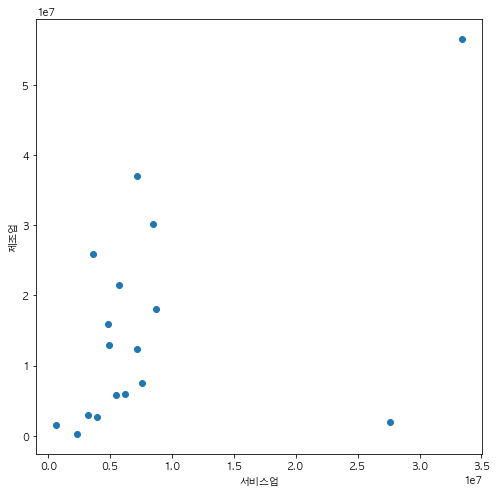

In [42]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

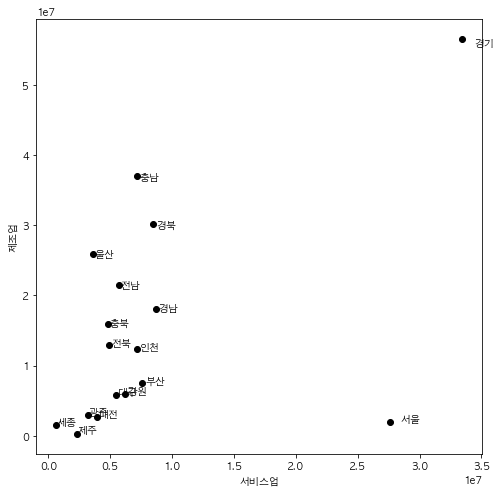

In [43]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'], c='k', marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [44]:
power = power.drop(['경기', '서울'])

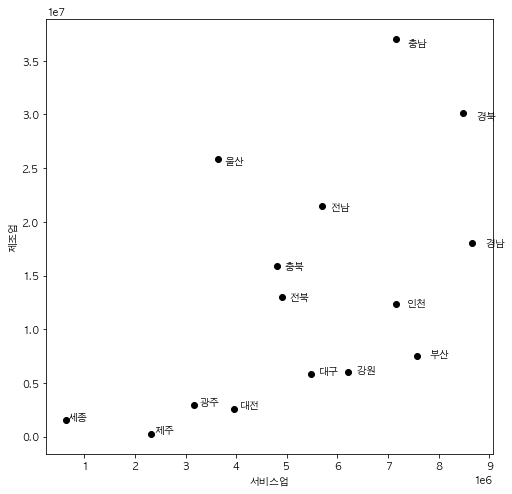

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'], c='k', marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])